
# Project: Investigate a Dataset (TMDb Movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including budget, revenue, popularity and others data for each movie.  
>My goal is to investigate and explore this data set by proposing the answers of these questions.
>>
    1.Which movies are top ten profitable?
    2.Which genres are most popular at all?
    3.Highest and lowest Budget  Movie ever?
    4.In which year most of the movies released?
    5.Which years have highest and lowest  profits for movies?
    6.What kinds of properties are associated with movies that have high revenues?
    7.What is the average of runtime movies?
    



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the data set 
TMDb_Data = pd.read_csv('tmdb-movies.csv')

In [3]:
TMDb_Data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
TMDb_Data.shape

(10866, 21)

In [5]:
# Checking data type
TMDb_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
TMDb_Data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# Checking the duplicated values
sum(TMDb_Data.duplicated())

1

In [8]:
# checking for the null values
TMDb_Data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# Checking the zero values in budget data
TMDb_Data[TMDb_Data['budget']==0].shape

(5696, 21)

In [10]:
# Checking the zero values in revenue data
TMDb_Data[TMDb_Data['revenue']==0].shape

(6016, 21)


### Data Cleaning 

After discussing the structure of the data and any problems that need to be
cleaned, we perform those cleaning steps 

#### Droping unnecessary columns

In [11]:
# Droping unnecessary columns
TMDb_Data.drop(['imdb_id','keywords', 'tagline','overview', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [12]:
TMDb_Data.head()

,id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015


#### Droping null values

In [13]:
# Droping null values
TMDb_Data.dropna(how = 'any',inplace = True)

In [14]:
# Testing
TMDb_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 0 to 10819
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2637 non-null   int64  
 1   popularity            2637 non-null   float64
 2   budget                2637 non-null   int64  
 3   revenue               2637 non-null   int64  
 4   original_title        2637 non-null   object 
 5   cast                  2637 non-null   object 
 6   homepage              2637 non-null   object 
 7   director              2637 non-null   object 
 8   runtime               2637 non-null   int64  
 9   genres                2637 non-null   object 
 10  production_companies  2637 non-null   object 
 11  release_date          2637 non-null   object 
 12  vote_average          2637 non-null   float64
 13  release_year          2637 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 309.0+ KB


#### Droping duplicates values

In [15]:
# Droping duplicates values
TMDb_Data.drop_duplicates(keep= 'first',inplace = True)

In [16]:
# Replacing 0 values to nan to drop in 'budget' and 'revenue'
TMDb_Data['budget'] = TMDb_Data['budget'].replace(0, np.NaN)
TMDb_Data['revenue'] = TMDb_Data['revenue'].replace(0, np.NaN)

#### Droping rows with zero values

In [17]:
# Dropind rows with zero values in budget and revenue
TMDb_Data.dropna(inplace =True)

In [18]:
# Testing
TMDb_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 10760
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1410 non-null   int64  
 1   popularity            1410 non-null   float64
 2   budget                1410 non-null   float64
 3   revenue               1410 non-null   float64
 4   original_title        1410 non-null   object 
 5   cast                  1410 non-null   object 
 6   homepage              1410 non-null   object 
 7   director              1410 non-null   object 
 8   runtime               1410 non-null   int64  
 9   genres                1410 non-null   object 
 10  production_companies  1410 non-null   object 
 11  release_date          1410 non-null   object 
 12  vote_average          1410 non-null   float64
 13  release_year          1410 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 165.2+ KB


In [19]:
# Testing
sum(TMDb_Data.duplicated())

0

In [20]:
# Testing
TMDb_Data.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

In [21]:
# Converting release_date data type to datetime 
TMDb_Data['release_date'] = pd.to_datetime(TMDb_Data['release_date'])

In [22]:
# Testing
TMDb_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 10760
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1410 non-null   int64         
 1   popularity            1410 non-null   float64       
 2   budget                1410 non-null   float64       
 3   revenue               1410 non-null   float64       
 4   original_title        1410 non-null   object        
 5   cast                  1410 non-null   object        
 6   homepage              1410 non-null   object        
 7   director              1410 non-null   object        
 8   runtime               1410 non-null   int64         
 9   genres                1410 non-null   object        
 10  production_companies  1410 non-null   object        
 11  release_date          1410 non-null   datetime64[ns]
 12  vote_average          1410 non-null   float64       
 13  release_year     

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which movies are top ten profitable?)

In [23]:
# Calculating the the profit for each movie data set
TMDb_Data['profit'] = TMDb_Data['revenue'] - TMDb_Data['budget']

In [24]:
# Sorting the profit data to get the top ten profitable movies
top_ten_profitable = TMDb_Data['profit'].sort_values(ascending = False).head(10)

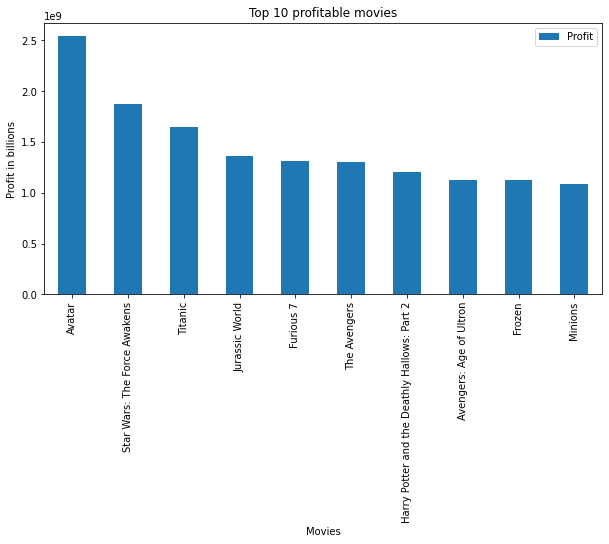

In [25]:
# Creating data frame top_profit
top_profit=pd.DataFrame()
# Creating profit and titles lists to fill the data and use them to plot the graph
profit=[]
titles=[]
# Looping to Fill the vallues from sorted top_ten_profitable data to the lists
for i in top_ten_profitable.index:
    titles.append(TMDb_Data.loc[i,'original_title'])
    profit.append(top_ten_profitable.loc[i])  
top_profit['Titles']=titles
top_profit['Profit']=profit
top_profit.set_index('Titles',inplace=True)
# Plotting the bar graph
top_profit.plot(kind ='bar',figsize=(10,5))
plt.title('Top 10 profitable movies');
plt.ylabel('Profit in billions');
plt.xlabel('Movies');

#### Avatar is the most profitable movie

### Research Question 2 (Which genres are most popular at all?)

In [26]:
TMDb_Data['genres'].value_counts()

Drama                                             89
Comedy                                            74
Drama|Romance                                     43
Comedy|Drama|Romance                              34
Comedy|Romance                                    33
                                                  ..
Fantasy|Thriller|Action|Crime                      1
Fantasy|Comedy|Music                               1
Thriller|Horror|Drama|Mystery                      1
Fantasy|Drama|Romance                              1
Fantasy|Action|Science Fiction|Thriller|Horror     1
Name: genres, Length: 530, dtype: int64

#### Drama is the most popular genres 

### Research Question 3  (Highest and lowest Budget  Movie ever?)

In [27]:
# Defining Function to get the highest and lowest data set
def highest_lowest(data_name):
    highest = TMDb_Data[data_name].idxmax()
    highest_df = pd.DataFrame(TMDb_Data.loc[highest])
    
    lowest = TMDb_Data[data_name].idxmin()
    lowest_df = pd.DataFrame(TMDb_Data.loc[lowest])
    
    high_low = pd.concat([highest_df, lowest_df], axis = 1)

    return high_low

In [28]:
highest_lowest('budget')

,2244,3581
id,46528,59296
popularity,0.25054,0.52043
budget,4.25e+08,1
revenue,1.10876e+07,1378
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
homepage,http://www.iamrogue.com/thewarriorsway,http://www.ifcfilms.com/films/love-wedding-mar...
director,Sngmoo Lee,Dermot Mulroney
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


#### The Warrior's Way has the highest budget and Love, Wedding, Marriage has the lowest one	

### Research Question 4  (In which year most of the movies released??)

In [29]:
TMDb_Data['release_year'].value_counts()

2011    170
2010    148
2009    126
2015    102
2008     99
2007     97
2012     95
2013     76
2014     75
2006     74
2005     55
2004     46
2003     33
2002     26
1999     24
2001     22
2000     16
1996     14
1998     13
1997      8
1995      8
1993      7
1981      6
1994      5
1992      5
1983      5
1971      4
1984      4
1979      4
1990      4
1987      4
1989      4
1982      3
1975      3
1985      2
1988      2
1980      2
1978      2
1977      2
1973      2
1991      2
1964      2
1965      1
1962      1
1963      1
1974      1
1967      1
1969      1
1972      1
1986      1
1961      1
Name: release_year, dtype: int64

#### 170 movies have been released in 2011

### Research Question 5 (Which years have highest and lowest  profits for movies?)

In [30]:
profit_year = TMDb_Data.groupby('release_year')['profit'].sum()

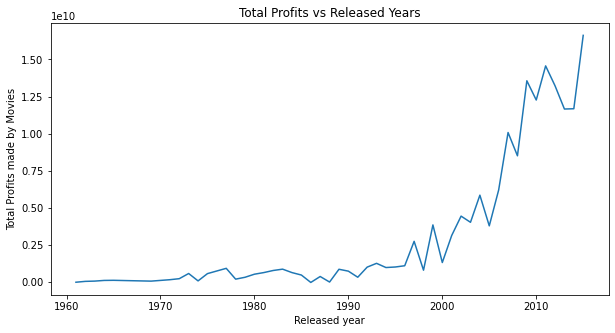

In [31]:
profit_year.plot(figsize = (10,5))
plt.xlabel('Released year')
plt.ylabel('Total Profits made by Movies')
plt.title('Total Profits vs Released Years');

#### It's clear that the profit increases within years

### Research Question 6  (What kinds of properties are associated with movies that have high revenues?)

In [32]:
TMDb_Data.sort_values(['revenue'] , ascending = False).head(10)

,id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,2.544506e+09
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.868178e+09
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,7.3,1997,1.645034e+09
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,7.3,2012,1.299558e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.363529e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.316249e+09
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,http://marvel.com/movies/movie/193/avengers_ag...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,7.4,2015,1.125036e+09
3374,12445,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,http://www.harrypotter.com,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,7.7,2011,1.202818e+09
5422,109445,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,http://movies.disney.com/frozen,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,7.5,2013,1.124219e+09
5425,68721,4.946136,200000000.0,1.215440e+09,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,http://marvel.com/ironman3,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6.9,2013,1.015440e+09


#### -It's obvious that action and science fiction movies with high budget have high revenues 

### Research Question 7  (What is the average of runtime movies?)

In [33]:
TMDb_Data['runtime'].describe()

count    1410.000000
mean      110.033333
std        18.990144
min        63.000000
25%        96.000000
50%       107.000000
75%       120.000000
max       213.000000
Name: runtime, dtype: float64

####  -The average run time is about 110 minutes, maximum and minimum are 213 and 63 minutes

<a id='conclusions'></a>
## Conclusions

> Finally, after assessing, cleaning and exploring the TMDb movie dataset using python functions and charts to help investigating about some dataset characteristics like profit, budget, revenue, genres and runtime of TDMb movie dataset, I have found
>>  
    -Drama is the most popular genres
    -Profit increases within years
    -The biggest number of released movies was in 2011
    -Action and Science Fiction movies have high revenue 
    -Average runtime movie is 110 minutes

